Importing the needed libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

Loading the cat non cat dataset file


In [26]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [27]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [0], it's a 'non-cat' picture.


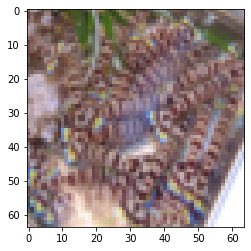

In [28]:
# Example of a picture
index = np.random.randint(17, 34)
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [29]:
training_ex = train_set_x_orig.shape[0]
test_ex = test_set_x_orig.shape[0]
pixel_size = train_set_x_orig.shape[1]

In [30]:
print(f"Number of training examples = {training_ex}")
print(f"Number of testing examples = {test_ex}")
print(f"Height to width is {pixel_size}")
print(f"Each image is of ({pixel_size}, {pixel_size}, 3) structure")
print(f"trai_x shape = {train_set_x_orig.shape}")
print(f"Test_x shape = {test_set_x_orig.shape}")
print(f"Train_y shape = {train_set_y.shape}")
print(f"test_y shape = {test_set_y.shape}")

Number of training examples = 209
Number of testing examples = 50
Height to width is 64
Each image is of (64, 64, 3) structure
trai_x shape = (209, 64, 64, 3)
Test_x shape = (50, 64, 64, 3)
Train_y shape = (1, 209)
test_y shape = (1, 50)


In [31]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten =  test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [32]:
print(f"Number of training examples = {training_ex}")
print(f"Number of testing examples = {test_ex}")
print(f"Height to width is {pixel_size}")
print(f"Each image is of ({pixel_size}, {pixel_size}, 3) structure")
print(f"trai_x shape = {train_set_x_flatten.shape}")
print(f"Test_x shape = {test_set_x_flatten.shape}")
print(f"Train_y shape = {train_set_y.shape}")
print(f"test_y shape = {test_set_y.shape}")

Number of training examples = 209
Number of testing examples = 50
Height to width is 64
Each image is of (64, 64, 3) structure
trai_x shape = (12288, 209)
Test_x shape = (12288, 50)
Train_y shape = (1, 209)
test_y shape = (1, 50)


Standardizing the dataset

In [33]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

Defining the sigmoid function

In [34]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [35]:
# Initializing parameters
def initialize(dimen):
    weight = np.zeros((dimen, 1))
    bias = 0.0

    return weight, bias

First forward and backward propagation of the network

In [36]:
def forward(X, y, weight, bias):
    examples = X.shape[1]
    prop = sigmoid(np.dot(weight.T, X) +bias)
    
    cost = -(np.sum(y * (np.log(prop)) + (1-y) * (np.log(1-prop))))/examples

    # Backward prop finding gradients(derivatives)

    dz = (prop - y)/ examples
    dw = np.dot(X, dz.T)
    db = np.sum(dz)

    cost = np.squeeze(cost)

    gradients = {
        "dweight": dw,
        "dbias" : db, 
    }

    return cost, gradients

In [37]:
# Optimization and running more iterations

def optimize(X, y, weights, bias, num_iter, lr, print_cost=False):
    costs = []

    for n in range(num_iter):
        cost, grads = forward(X, y, weights, bias)

        db = grads['dbias']
        dw = grads['dweight']

        # update weights and bias
        bias = bias - (lr * db)
        weights = weights - (lr * dw)

        updated_params = {
            "weights": weights,
            "bias" : bias,
        }
        updated_grads = {
            "dweights": dw,
            "dbias" : db,
        }
        # Keeping track of the cost

        if n % 100 == 0:
            costs.append(cost)
        
        #printing Cost
        if print_cost and n % 100 == 0:
            print(f"Iteration {n} the cost is {cost}")

    return updated_params, updated_grads, costs

In [ ]:
# Making predictions
def predict(weights, bias, X):
    data_examples = X.shape[1]
    predictions = np.zeros((1, data_examples))
    weights = weights.reshape(X.shape[0], 1)
    
    # Probabilities of a picture to contain a cat Image

    prob_c = sigmoid(np.dot(weights.T, X) + bias)

    predictions = 1. * (prob_c > 0.5)

    assert(predictions.shape[1] == data_examples)

    return predictions


In [ ]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print (f"predictions = {(predict(w, b, X))}")

In [ ]:
# Compiling all the designed function in one model to have a full logistic regression as NN

def model(X_train, y_train, X_test, y_test, num_iterations=100, learning_rate=0.6, print_cost=False):
    weights, bias = initialize(X_train.shape[0])
    parameters, _, cost = optimize(X_train, y_train, weights=weights, bias=bias, num_iter=num_iterations, lr=learning_rate, print_cost=print_cost)
    upadted_weights = parameters['weights']
    updated_bias = parameters['bias']
    
    # Predictions
    y_prediction_train = predict(upadted_weights, updated_bias, X_train)
    y_prediction_test = predict(upadted_weights, updated_bias, X_test)

    # Calculating the prediction Error
    print(f"Accuracy on training examples = {100 - np.mean(np.abs(y_prediction_train - y_train)) * 100}")
    print(f"Accuracy on test examples = {100 - np.mean(np.abs(y_prediction_test - y_test)) * 100}")

    compiled_model = {
        'costs': cost,
        'y_prediction_train' : y_prediction_train,
        'y_prediction_test' : y_prediction_test,
        'weights': upadted_weights,
        'bias' : updated_bias,
        'learning_rate' : learning_rate,
        'num_iterations' : num_iterations,
    }

    return compiled_model

In [ ]:
# training model
mod = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.006, print_cost=True)

In [ ]:
# Plorring the accuracy curve

costs = np.squeeze(mod['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title(f"Learning rate = {mod['learning_rate']}")
plt.show()

In [ ]:
# Testing the model against different learning rates
lrs = [2, 1, 0.11, 0.01, 0.001, 0.0001]
mods = {}
for l in lrs:
    print(f"The learning rate is {l}")
    mods[str(l)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = l, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in lrs:
    plt.plot(np.squeeze(mods[str(i)]["costs"]), label= str(mods[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

References

Deeplearning.AI course specialization(DLS) [DLS Coursera](https://www.coursera.org/specializations/deep-learning)

In [39]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print (f"predictions = {(predict(w, b, X))}")

predictions = [[1. 1. 0.]]


In [40]:
# Compiling all the designed function in one model to have a full logistic regression as NN

def model(X_train, y_train, X_test, y_test, num_iterations=100, learning_rate=0.6, print_cost=False):
    weights, bias = initialize(X_train.shape[0])
    parameters, _, cost = optimize(X_train, y_train, weights=weights, bias=bias, num_iter=num_iterations, lr=learning_rate, print_cost=print_cost)
    upadted_weights = parameters['weights']
    updated_bias = parameters['bias']
    
    # Predictions
    y_prediction_train = predict(upadted_weights, updated_bias, X_train)
    y_prediction_test = predict(upadted_weights, updated_bias, X_test)

    # Calculating the prediction Error
    print(f"Accuracy on training examples = {100 - np.mean(np.abs(y_prediction_train - y_train)) * 100}")
    print(f"Accuracy on test examples = {100 - np.mean(np.abs(y_prediction_test - y_test)) * 100}")

    compiled_model = {
        'costs': cost,
        'y_prediction_train' : y_prediction_train,
        'y_prediction_test' : y_prediction_test,
        'weights': upadted_weights,
        'bias' : updated_bias,
        'learning_rate' : learning_rate,
        'num_iterations' : num_iterations,
    }

    return compiled_model

In [42]:
# training model
mod = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.006, print_cost=True)

Iteration 0 the cost is 0.6931471805599453
Iteration 100 the cost is 0.6498112732446274
Iteration 200 the cost is 0.5383118237783534
Iteration 300 the cost is 0.4392616947889748
Iteration 400 the cost is 0.3498247654306745
Iteration 500 the cost is 0.2784984357971258
Iteration 600 the cost is 0.2497640022987191
Iteration 700 the cost is 0.23117767283922816
Iteration 800 the cost is 0.21522905139235482
Iteration 900 the cost is 0.2013388700395953
Iteration 1000 the cost is 0.18910956153096206
Iteration 1100 the cost is 0.17824871723940586
Iteration 1200 the cost is 0.16853308291181376
Iteration 1300 the cost is 0.1597878387174924
Iteration 1400 the cost is 0.15187341507476668
Iteration 1500 the cost is 0.14467661256301037
Iteration 1600 the cost is 0.13810439358104684
Iteration 1700 the cost is 0.13207941912877472
Iteration 1800 the cost is 0.12653676617044216
Iteration 1900 the cost is 0.1214214655660316
Accuracy on training examples = 99.52153110047847
Accuracy on test examples = 68.0

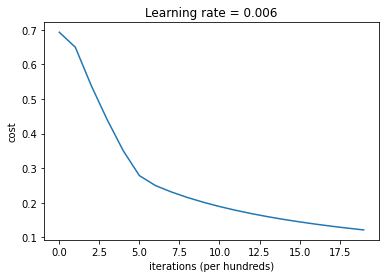

In [43]:
# Plorring the accuracy curve

costs = np.squeeze(mod['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title(f"Learning rate = {mod['learning_rate']}")
plt.show()

The learning rate is 2


/tmp/ipykernel_9044/3886325312.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/tmp/ipykernel_9044/1028065672.py:5: RuntimeWarning: divide by zero encountered in log
  cost = -(np.sum(y * (np.log(prop)) + (1-y) * (np.log(1-prop))))/examples
/tmp/ipykernel_9044/1028065672.py:5: RuntimeWarning: invalid value encountered in multiply
  cost = -(np.sum(y * (np.log(prop)) + (1-y) * (np.log(1-prop))))/examples


Accuracy on training examples = 100.0
Accuracy on test examples = 72.0

-------------------------------------------------------

The learning rate is 1
Accuracy on training examples = 100.0
Accuracy on test examples = 72.0

-------------------------------------------------------

The learning rate is 0.11
Accuracy on training examples = 100.0
Accuracy on test examples = 68.0

-------------------------------------------------------

The learning rate is 0.01
Accuracy on training examples = 99.52153110047847
Accuracy on test examples = 68.0

-------------------------------------------------------

The learning rate is 0.001
Accuracy on training examples = 88.99521531100478
Accuracy on test examples = 64.0

-------------------------------------------------------

The learning rate is 0.0001
Accuracy on training examples = 68.42105263157895
Accuracy on test examples = 36.0

-------------------------------------------------------



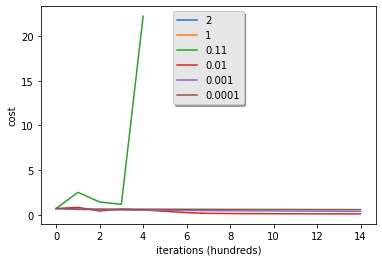

In [47]:
# Testing the model against different learning rates
lrs = [2, 1, 0.11, 0.01, 0.001, 0.0001]
mods = {}
for l in lrs:
    print(f"The learning rate is {l}")
    mods[str(l)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = l, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in lrs:
    plt.plot(np.squeeze(mods[str(i)]["costs"]), label= str(mods[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

References

Deeplearning.AI course specialization(DLS) [DLS Coursera](https://www.coursera.org/specializations/deep-learning)